# Complications (April 2015 - March 2016)

In [1]:
#%pylab osx
import os
import sys
from pyspark import SparkContext
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SparkSession
%matplotlib inline
%pylab inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

NationalRate = "/Users/pushparajparab/Desktop/Hospital_Revised_Flatfiles/Complications_National.csv"
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load(NationalRate)
#print(type(df))
df.registerTempTable('Mytable')


Complications = "/Users/pushparajparab/Desktop/Hospital_Revised_Flatfiles/Complications_Hospital.csv";
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load(Complications)
df.registerTempTable('Data')


query = " SELECT COUNT(Hospital_Name),M.Measure_Name,M.National_Rate"
query += " FROM Data D"
query += " JOIN Mytable M on D.Measure_ID = M.Measure_ID"
query += " where Compared_to_National = 'No Different than the National Rate'"
query += " group by M.Measure_Name,M.National_Rate"
query += " order by M.Measure_Name"
distint = spark.sql(query);
# distint.show();


Populating the interactive namespace from numpy and matplotlib


+----+-----+------+------------------------------------------------------------------------+-------------+
|Same|Worst|Better|Measure_Name                                                            |National_Rate|
+----+-----+------+------------------------------------------------------------------------+-------------+
|2467|1    |0     |A wound that splits open  after surgery on the abdomen or pelvis        |2.32         |
|2825|172  |91    |Accidental cuts and tears from medical treatment                        |1.43         |
|2203|33   |11    |Blood stream infection after surgery                                    |10.21        |
|2782|0    |0     |Broken hip from a fall after surgery                                    |0.06         |
|3062|25   |3     |Collapsed lung due to medical treatment                                 |0.41         |
|1709|34   |24    |Deaths among Patients with Serious Treatable Complications after Surgery|136.48       |
|3024|54   |0     |Infections from a 

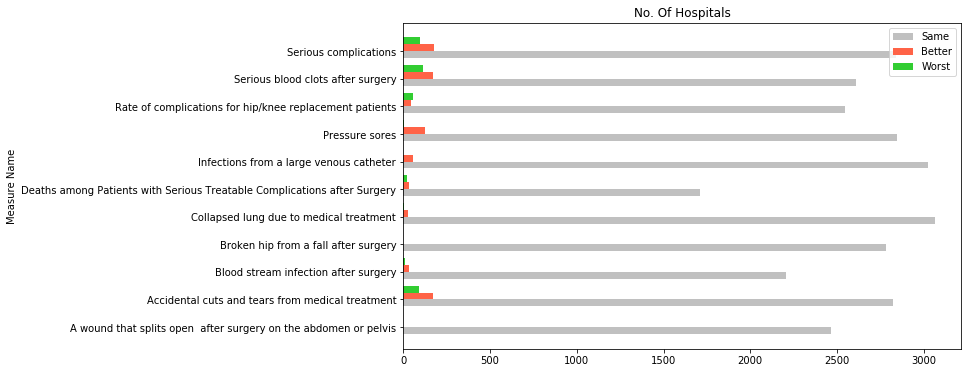

In [2]:

query = " SELECT COUNT(CASE WHEN Compared_to_National = 'No Different than the National Rate' then 1 ELSE NULL END) AS Same"
query += ",COUNT(CASE WHEN Compared_to_National = 'Worse than the National Rate' then 1 ELSE NULL END) AS Worst"
query += ",COUNT(CASE WHEN Compared_to_National = 'Better than the National Rate' then 1 ELSE NULL END) AS Better"
query += ",M.Measure_Name,M.National_Rate"
query += " FROM Data D"
query += " RIGHT JOIN Mytable M on M.Measure_ID = D.Measure_ID"
query += " GROUP BY M.Measure_Name,M.National_Rate"
query += " ORDER BY M.Measure_Name"
results = spark.sql(query);
results.show(20, False);

results.registerTempTable('Result_1')

_dataList = results.collect()
# _dataList
# matplotlib.rcParams['figure.figsize'] = (12, 8)
_same = []
_worst = []
_better = []
_lables =[]

for i in range(len(_dataList)):
    _same.append(_dataList[i][0])
    _worst.append(_dataList[i][1])
    _better.append(_dataList[i][2])
    _lables.append(_dataList[i][3])

N = len(_same)
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.barh(ind, _same, width, color='silver')
rects2 = ax.barh(ind + width, _worst, width, color='tomato')
rects3 = ax.barh(ind + (2*width), _better, width, color='limegreen')

ax.set_ylabel('Measure Name')
ax.set_title('No. Of Hospitals')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(_lables)

ax.legend((rects1[0], rects2[0], rects3[0]), ('Same','Better', 'Worst'))

plt.show()

+-----+------+------------------------------------------------------------------------+-------------+
|Worst|Better|Measure_Name                                                            |National_Rate|
+-----+------+------------------------------------------------------------------------+-------------+
|1    |0     |A wound that splits open  after surgery on the abdomen or pelvis        |2.32         |
|172  |91    |Accidental cuts and tears from medical treatment                        |1.43         |
|33   |11    |Blood stream infection after surgery                                    |10.21        |
|0    |0     |Broken hip from a fall after surgery                                    |0.06         |
|25   |3     |Collapsed lung due to medical treatment                                 |0.41         |
|34   |24    |Deaths among Patients with Serious Treatable Complications after Surgery|136.48       |
|54   |0     |Infections from a large venous catheter                             

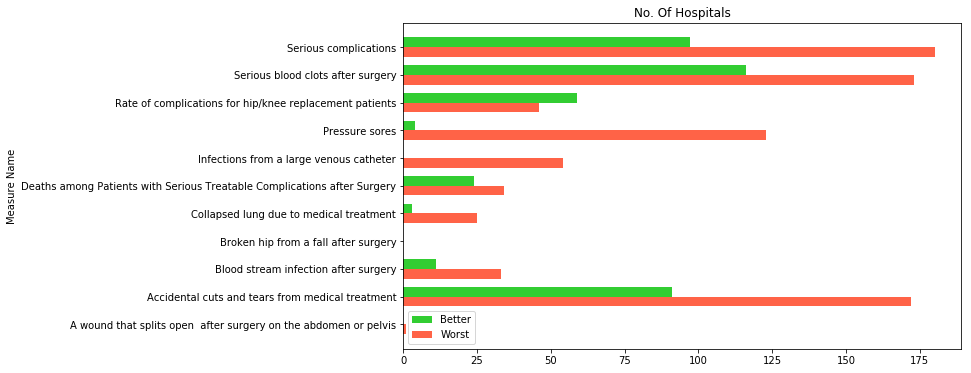

In [3]:

query = " SELECT Worst,Better,Measure_Name,National_Rate FROM Result_1"

results = spark.sql(query);
results.show(20, False);

_worst = []
_better = []
_lables =[]

for i in range(len(_dataList)):
    _worst.append(_dataList[i][1])
    _better.append(_dataList[i][2])
    _lables.append(_dataList[i][3])

N = len(_same)
ind = np.arange(N) 
width = 0.35
fig, ax = plt.subplots()

worst_bar = ax.barh(ind , _worst, width, color='tomato')
better_bar = ax.barh(ind + (width), _better, width, color='limegreen')

ax.set_ylabel('Measure Name')
ax.set_title('No. Of Hospitals')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(_lables)

ax.legend((better_bar[0],worst_bar[0]), ('Better', 'Worst'))

plt.show()

+----+-----+------+------------------------------------------------------------------------+-------------+
|Same|Worst|Better|Measure_Name                                                            |National_Rate|
+----+-----+------+------------------------------------------------------------------------+-------------+
|35  |0    |0     |A wound that splits open  after surgery on the abdomen or pelvis        |2.32         |
|49  |1    |0     |Accidental cuts and tears from medical treatment                        |1.43         |
|37  |0    |0     |Blood stream infection after surgery                                    |10.21        |
|48  |0    |0     |Broken hip from a fall after surgery                                    |0.06         |
|50  |0    |0     |Collapsed lung due to medical treatment                                 |0.41         |
|18  |0    |1     |Deaths among Patients with Serious Treatable Complications after Surgery|136.48       |
|48  |1    |0     |Infections from a 

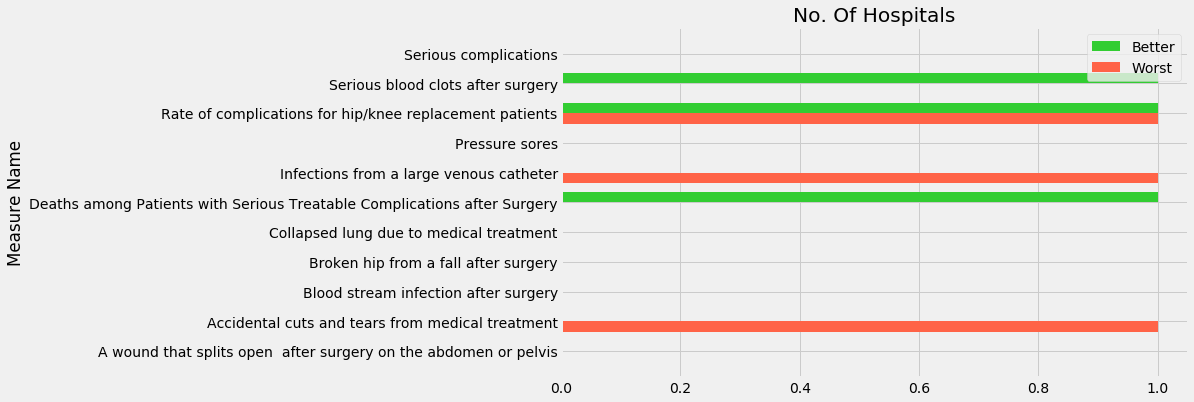

In union MN


In [4]:

import ipywidgets as widgets
from IPython.display import clear_output 



query = " SELECT DISTINCT State"
query += " FROM Data D WHERE STATE != 'AL'"
query += " ORDER BY State"
plt.style.use('fivethirtyeight')#assign the style for the plot
distint = spark.sql(query)
_dataList = distint.collect()
_states =[]
_selectedState = ""
for i in range(len(_dataList)):
    _states.append(_dataList[i][0])

select = widgets.Dropdown(
    options=_states,
    value='AZ',
    description='State:',
    disabled=False
)
display(select)

o_query = " SELECT COUNT(CASE WHEN Compared_to_National = 'No Different than the National Rate' then 1 ELSE NULL END) AS Same"
o_query += ",COUNT(CASE WHEN Compared_to_National = 'Worse than the National Rate' then 1 ELSE NULL END) AS Worst"
o_query += ",COUNT(CASE WHEN Compared_to_National = 'Better than the National Rate' then 1 ELSE NULL END) AS Better"
o_query += ",M.Measure_Name,M.National_Rate"
o_query += " FROM Data D"
o_query += " RIGHT JOIN Mytable M on M.Measure_ID = D.Measure_ID"

def get_Union(state):
    print("In union " + state)
    u_query = "SELECT Hospital_Name,Measure_Name FROM Data D"
    u_query += " WHERE State = '" + state
    u_query += "' AND Compared_to_National = 'Better than the National Rate'"
    u_query += " ORDER BY Hospital_Name ASC"
    u_result = spark.sql(u_query)
    u_result.registerTempTable('BTN')
    
    u_query = "SELECT Hospital_Name,Measure_Name FROM Data D"
    u_query += " WHERE State = '" + state
    u_query += "' AND Compared_to_National = 'Worse than the National Rate'"
    u_query += " ORDER BY Hospital_Name ASC"
    u_result = spark.sql(u_query)
    u_result.registerTempTable('WTN')



def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        _selectedState = change['new']
        query = o_query + " WHERE state = '"
        query += _selectedState
        query += "' GROUP BY M.Measure_Name,M.National_Rate"
        query += " ORDER BY M.Measure_Name"
        results = spark.sql(query);
        results.show(20, False)
        
        _dataList = results.collect()
        _worst = []
        _better = []
        _lables =[]

        for i in range(len(_dataList)):
            _worst.append(_dataList[i][1])
            _better.append(_dataList[i][2])
            _lables.append(_dataList[i][3])

        N = len(_same)
        ind = np.arange(N) 
        width = 0.35
        fig, ax = plt.subplots()

        worst_bar = ax.barh(ind , _worst, width, color='tomato')
        better_bar = ax.barh(ind + (width), _better, width, color='limegreen')

        ax.set_ylabel('Measure Name')
        ax.set_title('No. Of Hospitals')
        ax.set_yticks(ind + width / 2)
        ax.set_yticklabels(_lables)

        ax.legend((better_bar[0],worst_bar[0]), ('Better', 'Worst'))
        print("Ploting for " + _selectedState)
        plt.show()
        get_Union(_selectedState)
        

select.observe(on_change)
clear_output()



# Worst then National Rate

In [5]:
import plotly
# Set Plotly credetials

plotly.tools.set_credentials_file(username='pparab', api_key='jgQSn7NrsQAUnpx26Aks')
import plotly.plotly as py
import plotly.tools as plotly_tools
import plotly.graph_objs as go
from plotly.graph_objs import *
 #Sign in the plotly API
py.sign_in("pparab", "jgQSn7NrsQAUnpx26Aks")


u_query = "SELECT Hospital_Name,Measure_Name FROM WTN"
results = spark.sql(u_query);


u_query2 = "SELECT Hospital_Name,Measure_Name FROM BTN"
results2 = spark.sql(u_query2);
# results.show()
_x=[]
_y=[]
_x1=[]
_y1=[]


_dataList = results.collect();
for i in range(len(_dataList)):
            _x.append(_dataList[i][0])
            _y.append(_dataList[i][1])
_dataList2 = results2.collect();            
for i in range(len(_dataList2)):
            _x1.append(_dataList2[i][0])
            _y1.append(_dataList2[i][1])
            
trace = go.Scatter(
    x = _x,
    y = _y,
    hoveron = 'points',
    mode = 'markers',
    marker =dict( 
        size = 8,
        color = '#FF7070'
    )
)

data = [trace]
layout = go.Layout(
    autosize=False,
    width=900,
    height=900,
    margin=go.Margin(
        l=340,
        r=200,
        b=300,
        t=250,
        pad=4
    ),
    paper_bgcolor='#fff',
    plot_bgcolor='#fff'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-scatter_Complication_W')




# Better then National Rate

In [6]:
trace = go.Scatter(
    x = _x1,
    y = _y1,
    hoveron = 'points',
    mode = 'markers',
    marker =dict( 
        size = 8,
        color = '#008000'
    )
)

data = [trace]
layout = go.Layout(
    autosize=False,
    width=900,
    height=900,
    margin=go.Margin(
        l=340,
        r=200,
        b=300,
        t=250,
        pad=4
    ),
    paper_bgcolor='#fff',
    plot_bgcolor='#fff'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-scatter_Complication_B')
